# 원핫인코딩 (One-hot Encoding)

- 의미: 단어(또는 토큰)를 어휘 크기(vocab size)만큼의 길이를 가진 벡터로 바꾸는 방법
- 표현 방식: 해당 단어의 인덱스 위치만 1, 나머지는 전부 0 (즉, “이 단어가 맞다/아니다”만 표시)
- 예시: vocab size가 5이고 단어 인덱스가 3이면 → [0, 0, 1, 0, 0]
- 특징/주의: 단어 간 의미/유사도 정보는 없고, vocab이 커질수록 벡터가 매우 커져 메모리/연산 비용이 증가함
    - 그래서 실무에선 보통 임베딩(Embedding)으로 저차원 밀집(dense) 벡터로 바꿔 사용한다
- 사용 시기: 단어 수가 아주 작거나(카테고리/키워드 몇십~몇백) 간단한 모델/해석이 중요한 경우엔 원-핫/BoW를 사용할 때도 있다.

- 임베딩
    - 학습 가능한 변환(레이어/행렬): 단어 인덱스 k를 길이 d(예: 64, 128)인 밀집(dense) 벡터로 매핑
    - 예: k=3 → [0.12, -0.03, ...] (d차원)
    - 특징: 저차원, 밀집, 학습을 통해 의미/유사도가 반영될 수 있음

In [8]:
raw_text = """The Little Prince, written by Antoine de Saint-Exupéry, is a poetic tale about a young prince who travels from his home planet to Earth. The story begins with a pilot stranded in the Sahara Desert after his plane crashes. While trying to fix his plane, he meets a mysterious young boy, the Little Prince.

The Little Prince comes from a small asteroid called B-612, where he lives alone with a rose that he loves deeply. He recounts his journey to the pilot, describing his visits to several other planets. Each planet is inhabited by a different character, such as a king, a vain man, a drunkard, a businessman, a geographer, and a fox. Through these encounters, the Prince learns valuable lessons about love, responsibility, and the nature of adult behavior.

On Earth, the Little Prince meets various creatures, including a fox, who teaches him about relationships and the importance of taming, which means building ties with others. The fox's famous line, "You become responsible, forever, for what you have tamed," resonates with the Prince's feelings for his rose.

Ultimately, the Little Prince realizes that the essence of life is often invisible and can only be seen with the heart. After sharing his wisdom with the pilot, he prepares to return to his asteroid and his beloved rose. The story concludes with the pilot reflecting on the lessons learned from the Little Prince and the enduring impact of their friendship.

The narrative is a beautifully simple yet profound exploration of love, loss, and the importance of seeing beyond the surface of things."""

In [9]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

sentences = sent_tokenize(raw_text)

en_stopwords = stopwords.words('english')

vocab = {}

# 토큰화/정제/정규화 처리 결과
preprocessed_sentences = []

for sentence in sentences:
    sentence = sentence.lower()     # 소문자 변환
    tokens = word_tokenize(sentence)                # 문장을 단어(토큰) 리스트로 변환
    tokens = [token for token in tokens if token not in en_stopwords]  # 불용어 토큰 제거
    tokens = [token for token in tokens if len(token) > 2 ]  # 길이 2 이하 토큰 제거(노이즈 감소)

    # 전처리된 토큰들로 빈도 집계
    for token in tokens:
        # token이 vocab에 없으면 빈도 1로 초기화, vocab에 이미 존재하면 +1
        if token not in vocab:
            vocab[token] = 1
        else:
            vocab[token] += 1

    preprocessed_sentences.append(tokens)

print(preprocessed_sentences)
print(vocab)


[['little', 'prince', 'written', 'antoine', 'saint-exupéry', 'poetic', 'tale', 'young', 'prince', 'travels', 'home', 'planet', 'earth'], ['story', 'begins', 'pilot', 'stranded', 'sahara', 'desert', 'plane', 'crashes'], ['trying', 'fix', 'plane', 'meets', 'mysterious', 'young', 'boy', 'little', 'prince'], ['little', 'prince', 'comes', 'small', 'asteroid', 'called', 'b-612', 'lives', 'alone', 'rose', 'loves', 'deeply'], ['recounts', 'journey', 'pilot', 'describing', 'visits', 'several', 'planets'], ['planet', 'inhabited', 'different', 'character', 'king', 'vain', 'man', 'drunkard', 'businessman', 'geographer', 'fox'], ['encounters', 'prince', 'learns', 'valuable', 'lessons', 'love', 'responsibility', 'nature', 'adult', 'behavior'], ['earth', 'little', 'prince', 'meets', 'various', 'creatures', 'including', 'fox', 'teaches', 'relationships', 'importance', 'taming', 'means', 'building', 'ties', 'others'], ['fox', 'famous', 'line', 'become', 'responsible', 'forever', 'tamed', 'resonates', '

In [ ]:
# keras 토큰 인덱싱 + 정수 시퀀스 변환 + padding/trucation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=15, oov_token='<OOV>')
tokenizer.fit_on_texts(preprocessed_sentences)
sequences = tokenizer.texts_to_sequences(preprocessed_sentences)

# 길이 10으로 통일. 길면 앞으로 자르고, 짧으면 0으로 채우기
padded_seqs = pad_sequences(sequences, maxlen=10, truncating='pre', padding='pre')
padded_seqs



array([[ 1,  1,  1,  1,  7,  2,  1,  1,  8,  9],
       [ 0,  0, 10,  1,  4,  1,  1,  1, 11,  1],
       [ 0,  1,  1, 11, 12,  1,  7,  1,  3,  2],
       [ 1,  1, 13,  1,  1,  1,  1,  5,  1,  1],
       [ 0,  0,  0,  1,  1,  4,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  6],
       [ 1,  2,  1,  1, 14,  1,  1,  1,  1,  1],
       [ 1,  6,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  2,  1,  5],
       [ 1,  3,  2,  1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  1,  1,  4,  1,  1, 13,  1,  5],
       [ 1,  4,  1, 14,  1,  3,  2,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1]], dtype=int32)

In [ ]:
padded_seqs.shape   # (문장 수, 문장 길이)

(13, 10)

In [ ]:
# 정수 시퀀스를 원-핫 벡터로 변환(One-hot Encoding)
from tensorflow.keras.utils import to_categorical       # 정수 라벨/인덱스를 원-핫 벡터로 바꾸는 함수

one_hot_encodded = to_categorical(padded_seqs)          # (문장,길이) 정수 인덱스를 (문장, 길이, 클래스 수) 원-핫으로 변환
one_hot_encodded

array([[[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [18]:
one_hot_encodded.shape

(13, 10, 15)

shape이 (문장 개수,토큰길이,vocab_size)  
마지막 차원인 vocab_size는 padded_seqs에 등장한 최대 인덱스 +1 크기이다. (0=PAD 포함)

### 한국어 전처리

1. 토큰화 (형태소 분석)
2. 시퀀스 처리 Tokenizer
3. 패딩처리 pad_sequences
4. one-hot encoding

In [23]:
texts = [
    "나는 오늘 학원에 간다.",
    "친구들과 맛있는 점심 식사를 해서 기분이 좋다.",
    "오늘은 또 어떤 재미난 수업을 할지 너무 기대된다."
]

In [25]:
# KoNLPy(Okt) 형태소 분석 기반 한국어 전처리 + 불용어/기호 제거
from konlpy.tag import Okt      # KoNLPy의 Okt 형태소 분석기
import re                       # 정규표현식

okt = Okt() # Okt 형태소 분석기 객체 생성

# 한국어 불용어 리스트
ko_stopwords = ['은','는','이','가','을','를','와','과','에','의','으로','나','내','우리','들','또','난']

preprocessed_texts = []

for text in texts:      # 원문 텍스트 리스트를 한 문장씩 순회
    tokens = okt.morphs(text, stem=True)    # 형태소 단위로 분해(어간 추출 적용)
    tokens = [token for token in tokens if token not in ko_stopwords]
    tokens = [token for token in tokens if not re.search(r'[\s.,:;?!]',token)]
    preprocessed_texts.append(tokens)
    
preprocessed_texts

[['오늘', '학원', '간다'],
 ['친구', '맛있다', '점심', '식사', '하다', '기분', '좋다'],
 ['오늘', '어떻다', '재미', '수업', '하다', '너무', '기대', '되다']]

In [40]:
# keras Tokenizer : 한국어 토큰 시퀀스를 저수 인덱스로 변환(OOV 포함)
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(preprocessed_texts)      # 전처리된 토큰 리스트로 단어사전 학습 (word_index, index_word)
sequences = tokenizer.texts_to_sequences(preprocessed_texts)
sequences

[[2, 4, 5], [6, 7, 8, 9, 3, 10, 11], [2, 12, 13, 14, 3, 15, 16, 17]]

In [34]:
tokenizer.word_index    # 코퍼스에 등장한 단어(토큰) -> 인덱스 매핑 딕셔너리(값이 작은 인덱스는 더 자주 등장한 단어)

{'<OOV>': 1,
 '오늘': 2,
 '하다': 3,
 '학원': 4,
 '간다': 5,
 '친구': 6,
 '맛있다': 7,
 '점심': 8,
 '식사': 9,
 '기분': 10,
 '좋다': 11,
 '어떻다': 12,
 '재미': 13,
 '수업': 14,
 '너무': 15,
 '기대': 16,
 '되다': 17}

In [ ]:
# Keras pad_sequnces로 시퀀스 패딩 (길이 6)
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_seqs = pad_sequences(sequences, maxlen=6)    # 길이 6으로 통일 (기본값 padding ='pre', truncating='pre')
padded_seqs

array([[ 0,  0,  0,  2,  4,  5],
       [ 7,  8,  9,  3, 10, 11],
       [13, 14,  3, 15, 16, 17]], dtype=int32)

In [44]:
padded_seqs.shape

(3, 6)

In [ ]:
# 정수 시퀀스를 원-핫 벡터로 변환 (One-hoe Encoding)
from tensorflow.keras.utils import to_categorical   # 정수 인덱스를 원-핫 벡터로 변환하는 함수

one_hot_encodded = to_categorical(padded_seqs)
one_hot_encodded.shape

(3, 6, 18)

shape :(문장 개수, 패딩포함 길이, 최대인덱스 +1)  
마지막 차원은 0(PAD)가 포함되어 +1이다.

In [ ]:
# 원-핫 시퀀스 입력(길이 6, vocab 18)을 SimpleRNN 모델로 이진분류 구성
from tensorflow.keras import models, layers     # Keras 모델/렝어 구성 요소

input = layers.Input(shape=(6,18))          # 입력 텐서 정의 : (timesteps=6, features=18)   원-핫 벡터 시퀀스
x = layers.SimpleRNN(8)(input)              # RNN 은닉유닛 8개
output = layers.Dense(1,activation='sigmoid')(x)    # 이진 분류용 출력: 확률(0~1) 1개로 변환

model = models.Model(inputs=input, outputs=output)  # Functional API로 입력 -> 출력 연결해 모델 생성
model.summary()                                     # 모델 레이어 구성/파라미터 수 요약 출력

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6, 18)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 8)              │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# 모델 컴파일 + 라벨 준비 + 원-핫 입력으로 학습 수행
import numpy as np

# 이진분류용 손실/옵티마이저/평가지표 학습 설정
model.compile(loss= 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

labels = np.array([1,0,1])  # 각 샘플(문장)에 대한 정답 라벨

model.fit(one_hot_encodded,labels,epochs=3)

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step - accuracy: 0.3333 - loss: 0.8092
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3333 - loss: 0.7967
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3333 - loss: 0.7843


- **임베딩을 쓰기 전 단계 데모**로 가장 단순한 방법으로 학습까지 진행해봤다.
- 일반적으로 원- 핫 인코딩을
    - vocab이 커지면 원-핫 차원이 너무 커져서 **메모리/연산이 비효율적**
    - 단어 의미/유사도 정보를 못 담음
- 이러한 이유로 잘 사용하지 않기 때문에 정수 인덱스를 그대로 넣고 Embedding을 학습
    - 입력: `(batch, timesteps)` 정수 인덱스
    - `Embedding(vocab_size, embed_dim)` → `(batch, timesteps, embed_dim)`
    - 그 다음 RNN/Transformer 모델로 학습한다.

| 표현 방식                     | 입력 단위        | 벡터 형태(Shape)                               | 값이 의미하는 것                      | 순서(문맥) 보존    | 장점                                  | 단점                                      | 주 사용처                                     |
| ------------------------- | ------------ | ------------------------------------------ | ------------------------------ | ------------ | ----------------------------------- | --------------------------------------- | ----------------------------------------- |
| **원-핫(시퀀스)**              | 토큰 시퀀스(문장)   | `(seq_len, V)` 또는 배치 `(batch, seq_len, V)` | 각 토큰을 길이 `V` 벡터로 표시(해당 인덱스만 1) | ✅(시퀀스 구조 유지) | 구현/이해가 쉬움, RNN 입력으로 바로 가능           | `V`가 커지면 메모리/연산 폭발(매우 희소), 의미/유사도 정보 없음 | 교육용 데모, 아주 작은 vocab 실험                    |
| **BoW (CountVectorizer)** | 문서(문장/리뷰) 1개 | `(V)` 또는 `(batch, V)`                      | 단어 등장 **횟수**(count)            | ❌            | 빠르고 간단, 전통 ML에서 강력                  | 단어 순서/문맥 완전 손실, 고차원 희소                  | 스팸 분류/감성분석의 베이스라인, 빠른 EDA                 |
| **TF-IDF**                | 문서(문장/리뷰) 1개 | `(V)` 또는 `(batch, V)`                      | 단어 중요도 = 빈도(TF) × 희귀성(IDF)     | ❌            | BoW보다 “중요 단어”가 잘 드러남, 전통 ML 성능 좋음   | 문맥/순서 손실, 여전히 고차원 희소                    | 검색/유사도, 분류 베이스라인(Linear SVM, LR)          |
| **Embedding**             | 토큰 시퀀스(문장)   | `(seq_len, d)` 또는 `(batch, seq_len, d)`    | 토큰 ID → **d차원 실수 벡터**(학습/사전학습) | ✅            | 저차원 밀집(dense), 의미/유사도 학습 가능, 딥러닝 표준 | 학습 데이터/자원 필요, 해석이 상대적으로 어려움             | RNN/LSTM/GRU/Transformer 입력, 거의 모든 현대 NLP |

# 워드 클라우드 (word cloud)

- 목적/용도: 문서/리뷰/뉴스에서 자주 등장하는 키워드를 한눈에 파악하는 “탐색(EDA)용 요약 시각화”
- 빈도 vs 중요도: 단순 빈도 외에도 TF-IDF(문서 내 중요도) 같은 가중치를 크기로 쓸 수 있음
- 전처리에서 특히 중요한 것
    - 불용어(조사/관사) 제거 + 표제어/어간 통일(예: kept/keep)
    - 필요하면 n-gram(예: ‘고객 이탈’, ‘머신 러닝’) 도 단어처럼 묶어서 표현
- 주의점(해석): 크기는 “많이 나온 정도”일 뿐이라 긍/부정, 문맥, 원인을 직접 말해주진 않음 → 다른 분석(감성/토픽 등)과 같이 보는 게 좋음
- 옵션 팁: 마스크 이미지 적용(형태 지정), max_words, min_freq, 색상/폰트(한글은 폰트 지정 필요)로 가독성 조절 가능

1. 텍스트 전처리
2. 단어 빈도 계산
3. 단어 크기 결정
4. 단어 배치
5. 시각화

In [51]:
%pip install wordcloud gdown

  Using cached beautifulsoup4-4.14.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl.metadata (13 kB)
Using cached beautifulsoup4-4.14.3-py3-none-any.whl (107 kB)
Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)

   ---------------------------------------- 0/5 [soupsieve]
   -------- ------------------------------- 1/5 [PySocks]
   ---------------- ----------------------- 2/5 [beautifulsoup4]
   ---------------- ----------------------- 2/5 [beautifulsoup4]
   ---------------- ----------------------- 2/5 [beautifulsoup4]
   ------------------------ --------------- 3/5 [wordcloud]
   ------------------------ --------------- 3/5 [wordcloud]
   ------------------------ --------------- 3/5 [wordcloud]
   -------------------------------- ------- 4/5 [gdown]
   -------------------------------- ------- 4/5 [gdown]
   -------------------------------- ------- 4/5 [gdown]
   ---------------------------------------- 5/5 [gdown]

Note: you may need to restart the

#### 데이터 준비

In [ ]:
# https://drive.google.com/file/d/1yXNdduc6iAxtZo0BMuGDttVW7A90mFQ-/view?usp=sharing
import gdown    # 구글 드라이브 파일을 파이썬에서 내려받는 라이브러리

id = '1yXNdduc6iAxtZo0BMuGDttVW7A90mFQ-'
url = f'https://drive.google.com/uc?id={id}'
output = 'sms_spem.csv'

gdown.download(url,output)

Downloading...
From: https://drive.google.com/uc?id=1yXNdduc6iAxtZo0BMuGDttVW7A90mFQ-
To: c:\Users\Playdata\nlp\02_preprocessing\sms_spem.csv
100%|██████████| 33.7M/33.7M [00:03<00:00, 10.0MB/s]


'sms_spem.csv'

In [53]:
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [56]:
spam_df = pd.read_csv('sms_spem.csv')
spam_df

,SEQ,CN
0,842298,[Web발신]ifg@(광고)[한음대리점 율량점] 류태자 단골고객님ifg@ifg@마지...
1,842299,[Web발신]ifg@(광고)[전자랜드중동점]ifg@최은순 고객님!ifg@전자랜드 *...
2,842300,"제목 : (광고)현대미아점 통합ifg@▶*O,OOO원할인권◀도착ifg@현대미아 설화..."
3,842301,[Web발신]ifg@(광고) 신세계면세점 명동점ifg@ifg@본 문자 수신 고객님께...
4,842302,[Web발신]ifg@(광고) 롯데마트 소중한 집사의 통장을 지켜라! 멍이도 냥이도 ...
...,...,...
29583,871887,"[국제발신]ifg@저한국에가는데 친구가 당신이공항에마중나올시간이있다고 했어요, 제L..."
29584,871888,[Web발신]ifg@(광고) 루이까스텔 인천구월*ifg@★루이까스텔 인천구월점★if...
29585,871889,[국제발신]ifg@나는 한국에 있어 한국 오빠를 찾아서 같이 살고 싶다 나의 라인을...
29586,871890,"[국제발신]ifg@요즘 잘 지내세요? *월 *일에 한국으로 여행 오고 싶은데, 같이..."


In [ ]:
corpus = spam_df['CN'][0]   # CN 컬럼의 첫 번째 문장(인덱스 0)
corpus

'[Web발신]ifg@(광고)[한음대리점 율량점] 류태자 단골고객님ifg@ifg@마지막 최대할인입니다!!!!!!!ifg@SKT SKT SKT 기기변경 기기변경 ifg@ifg@▶▶▶▶▶Z플립* ***G◀◀◀◀◀ifg@☞☞☞☞공시지원금 기준☜☜☜☜ifg@ifg@기기값 : *,***,***원ifg@ifg@공시지원금 : -***,***원ifg@매장추가지원금 : -***,***원 ifg@ifg@★★★구매금액 : **,***원★★★ifg@ifg@***G 대용량 저장공간이라 오래오래 사용하실 수 있습니다!!!!ifg@극소량으로 조기종료가능성 있습니다ifg@ifg@▶ 단골이라서 더 드림 혜택 자세히 보기(SKT 공식 대리점 홈페이지로 연결) ifg@http://dangol.t-mms.kr/dt.do?m=*********&u=tworldfriends.co.kr/D*********ifg@ifg@(무료ARS)수신거부 및 단골해지 : ifg@***-***-****'

In [ ]:
okt = Okt()
nouns = okt.nouns(corpus)   # corpus 문자열에서 명사만 추출해 리스트 반환
nouns

['발신',
 '광고',
 '한음',
 '대리점',
 '율량점',
 '류태자',
 '단골',
 '고객',
 '마지막',
 '최대',
 '할인',
 '기기',
 '변경',
 '기기',
 '변경',
 '플립',
 '원금',
 '기준',
 '기기',
 '값',
 '원',
 '원금',
 '원',
 '매장',
 '추가',
 '원금',
 '원',
 '구매',
 '금액',
 '원',
 '용량',
 '장공',
 '오래오래',
 '사용',
 '수',
 '소량',
 '조기',
 '종료',
 '가능성',
 '단골',
 '더',
 '드림',
 '혜택',
 '보기',
 '공식',
 '대리점',
 '홈페이지',
 '연결',
 '무료',
 '수신',
 '거부',
 '및',
 '단골',
 '해지']

In [ ]:
word_count = Counter(nouns) # 명사 리스트에서 단어별 등장 횟수를 Counter({단어:빈도})로 집계
word_count

Counter({'원': 4,
         '단골': 3,
         '기기': 3,
         '원금': 3,
         '대리점': 2,
         '변경': 2,
         '발신': 1,
         '광고': 1,
         '한음': 1,
         '율량점': 1,
         '류태자': 1,
         '고객': 1,
         '마지막': 1,
         '최대': 1,
         '할인': 1,
         '플립': 1,
         '기준': 1,
         '값': 1,
         '매장': 1,
         '추가': 1,
         '구매': 1,
         '금액': 1,
         '용량': 1,
         '장공': 1,
         '오래오래': 1,
         '사용': 1,
         '수': 1,
         '소량': 1,
         '조기': 1,
         '종료': 1,
         '가능성': 1,
         '더': 1,
         '드림': 1,
         '혜택': 1,
         '보기': 1,
         '공식': 1,
         '홈페이지': 1,
         '연결': 1,
         '무료': 1,
         '수신': 1,
         '거부': 1,
         '및': 1,
         '해지': 1})

In [61]:
# 불용어 처리
ko_stopwords=["및","더","수"]
word_count={word:count for word,count in word_count.items() if word not in ko_stopwords}
word_count


{'발신': 1,
 '광고': 1,
 '한음': 1,
 '대리점': 2,
 '율량점': 1,
 '류태자': 1,
 '단골': 3,
 '고객': 1,
 '마지막': 1,
 '최대': 1,
 '할인': 1,
 '기기': 3,
 '변경': 2,
 '플립': 1,
 '원금': 3,
 '기준': 1,
 '값': 1,
 '원': 4,
 '매장': 1,
 '추가': 1,
 '구매': 1,
 '금액': 1,
 '용량': 1,
 '장공': 1,
 '오래오래': 1,
 '사용': 1,
 '소량': 1,
 '조기': 1,
 '종료': 1,
 '가능성': 1,
 '드림': 1,
 '혜택': 1,
 '보기': 1,
 '공식': 1,
 '홈페이지': 1,
 '연결': 1,
 '무료': 1,
 '수신': 1,
 '거부': 1,
 '해지': 1}

In [70]:
wordCloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    font_path='C:/Windows/Fonts/gulim.ttc'
).generate_from_frequencies(word_count) # {단어:빈도}를 바탕으로 단어 크기/배치 생성

wordCloud

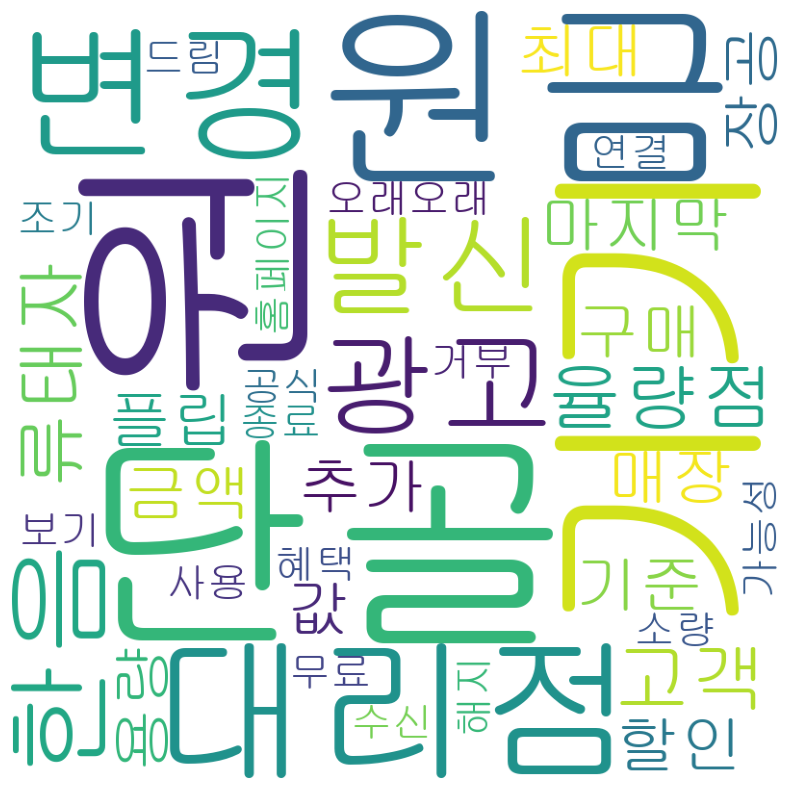

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(wordCloud)
plt.axis('off') # 축/눈금 제거
plt.show()

전체 데이터를 

In [72]:
corpus = spam_df['CN']
corpus

0        [Web발신]ifg@(광고)[한음대리점 율량점] 류태자 단골고객님ifg@ifg@마지...
1        [Web발신]ifg@(광고)[전자랜드중동점]ifg@최은순 고객님!ifg@전자랜드 *...
2        제목 : (광고)현대미아점 통합ifg@▶*O,OOO원할인권◀도착ifg@현대미아 설화...
3        [Web발신]ifg@(광고) 신세계면세점 명동점ifg@ifg@본 문자 수신 고객님께...
4        [Web발신]ifg@(광고) 롯데마트 소중한 집사의 통장을 지켜라! 멍이도 냥이도 ...
                               ...                        
29583    [국제발신]ifg@저한국에가는데 친구가 당신이공항에마중나올시간이있다고 했어요, 제L...
29584    [Web발신]ifg@(광고) 루이까스텔 인천구월*ifg@★루이까스텔 인천구월점★if...
29585    [국제발신]ifg@나는 한국에 있어 한국 오빠를 찾아서 같이 살고 싶다 나의 라인을...
29586    [국제발신]ifg@요즘 잘 지내세요? *월 *일에 한국으로 여행 오고 싶은데, 같이...
29587    [Web발신]ifg@(광고) 루이까스텔 대구신암쩜ifg@오픈**주년 기념 고객사은행...
Name: CN, Length: 29588, dtype: object

In [73]:
okt = Okt()
nouns = []

for corpus_temp in corpus:
    nouns.extend(okt.nouns(corpus_temp))    # 문장별 명사 리스트를 추출해 nouns 리스트에 이어붙임

nouns    

['발신',
 '광고',
 '한음',
 '대리점',
 '율량점',
 '류태자',
 '단골',
 '고객',
 '마지막',
 '최대',
 '할인',
 '기기',
 '변경',
 '기기',
 '변경',
 '플립',
 '원금',
 '기준',
 '기기',
 '값',
 '원',
 '원금',
 '원',
 '매장',
 '추가',
 '원금',
 '원',
 '구매',
 '금액',
 '원',
 '용량',
 '장공',
 '오래오래',
 '사용',
 '수',
 '소량',
 '조기',
 '종료',
 '가능성',
 '단골',
 '더',
 '드림',
 '혜택',
 '보기',
 '공식',
 '대리점',
 '홈페이지',
 '연결',
 '무료',
 '수신',
 '거부',
 '및',
 '단골',
 '해지',
 '발신',
 '광고',
 '전자랜드',
 '동점',
 '최은순',
 '고객',
 '전자랜드',
 '월',
 '전국동시',
 '일',
 '기간',
 '토',
 '월',
 '가전제품',
 '배달',
 '전자랜드',
 '배민',
 '스토어',
 '바로',
 '배달',
 '혼수',
 '가전',
 '견적',
 '꼭',
 '한번',
 '곳',
 '에어컨',
 '추천',
 '전문가',
 '에어컨',
 '만',
 '냉장고',
 '건조기',
 '등',
 '개',
 '품목',
 '전국동시',
 '일',
 '선풍기',
 '인치',
 '원',
 '건조기',
 '삼성',
 '만',
 '냉장고',
 '만',
 '인치',
 '만',
 '삼성',
 '인치',
 '만',
 '아이폰',
 '미니',
 '갤럭시',
 '학생',
 '폰',
 '추천',
 '원',
 '만원',
 '모바일',
 '행사',
 '내용',
 '보기',
 '갤럭시',
 '원',
 '갤럭시',
 '만원',
 '갤럭시',
 '울트라',
 '만원',
 '갤럭시',
 '플립',
 '만원',
 '아이폰',
 '미니',
 '원',
 '아이폰',
 '원',
 '아이폰',
 '원',
 '아이폰',
 '프로',
 '만원',
 '개월',
 '약정',
 '통신',
 '사별'

In [ ]:
word_count = Counter(nouns)

ko_stopwords = ['은','는','이','가','및','더','수']
word_count = {word:count for word,count in word_count.items() if word not in ko_stopwords}

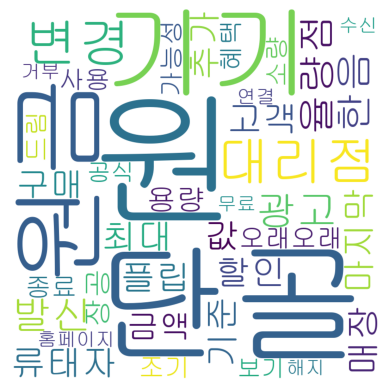

In [81]:
from PIL import Image

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    font_path='C:/Windows/Fonts/gulim.ttc',
    mask = np.array(Image.open('cloud.png'))    # 마스크 이미지 로드 -> 배열 변환
    
).generate_from_frequencies(word_count)

plt.imshow(wordCloud)
plt.axis('off')
plt.show()

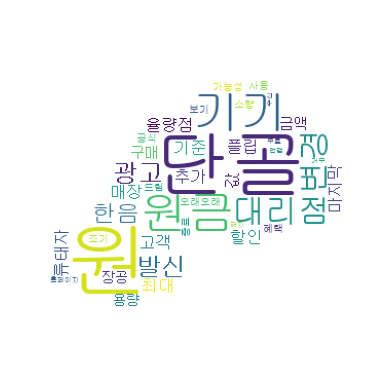

In [ ]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

img = Image.open('cloud.png').convert('RGBA')       # 이미지파일을 RGBA(투명도 포함)로 로드
alpha = np.array(img)[:,:,3]                        # 알파 채널만 추출(0=투명, 255=불투명)

mask= np.where(alpha > 0,255,0).astype(np.uint8)    # 불투명(구름) 영역 = 255, 투명(배경) 영역 = 0로 이진 마스크 생성
mask = 255 - mask   # 마스크 반전 (배경/구름 영역이 반대로 적용될 때 사용)

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    font_path='C:/Windows/Fonts/gulim.ttc',
    mask = mask     # 단어를 채울 영역(마스크)
).generate_from_frequencies(word_count)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()